In [460]:
import numpy as np
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [461]:
data = pd.read_csv('index (2).csv', delimiter=',')
data.dropna()
print(data)#


                            dataset_id  \
0              Appenzeller-Herzog_2020   
1                   Bannach-Brown_2019   
2                             Bos_2018   
3             Cohen_2006_ACEInhibitors   
4                      Cohen_2006_ADHD   
5            Cohen_2006_Antihistamines   
6    Cohen_2006_AtypicalAntipsychotics   
7              Cohen_2006_BetaBlockers   
8    Cohen_2006_CalciumChannelBlockers   
9                 Cohen_2006_Estrogens   
10                   Cohen_2006_NSAIDS   
11                   Cohen_2006_Opiods   
12        Cohen_2006_OralHypoglycemics   
13     Cohen_2006_ProtonPumpInhibitors   
14  Cohen_2006_SkeletalMuscleRelaxants   
15                  Cohen_2006_Statins   
16                 Cohen_2006_Triptans   
17      Cohen_2006_UrinaryIncontinence   
18                           Hall_2012   
19                     Kitchenham_2010   
20                           Kwok_2020   
21                      Nagtegaal_2019   
22                     Radjenovic_

<ipython-input-462-af6154559dc5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, fmt = '.3f')


<Axes: >

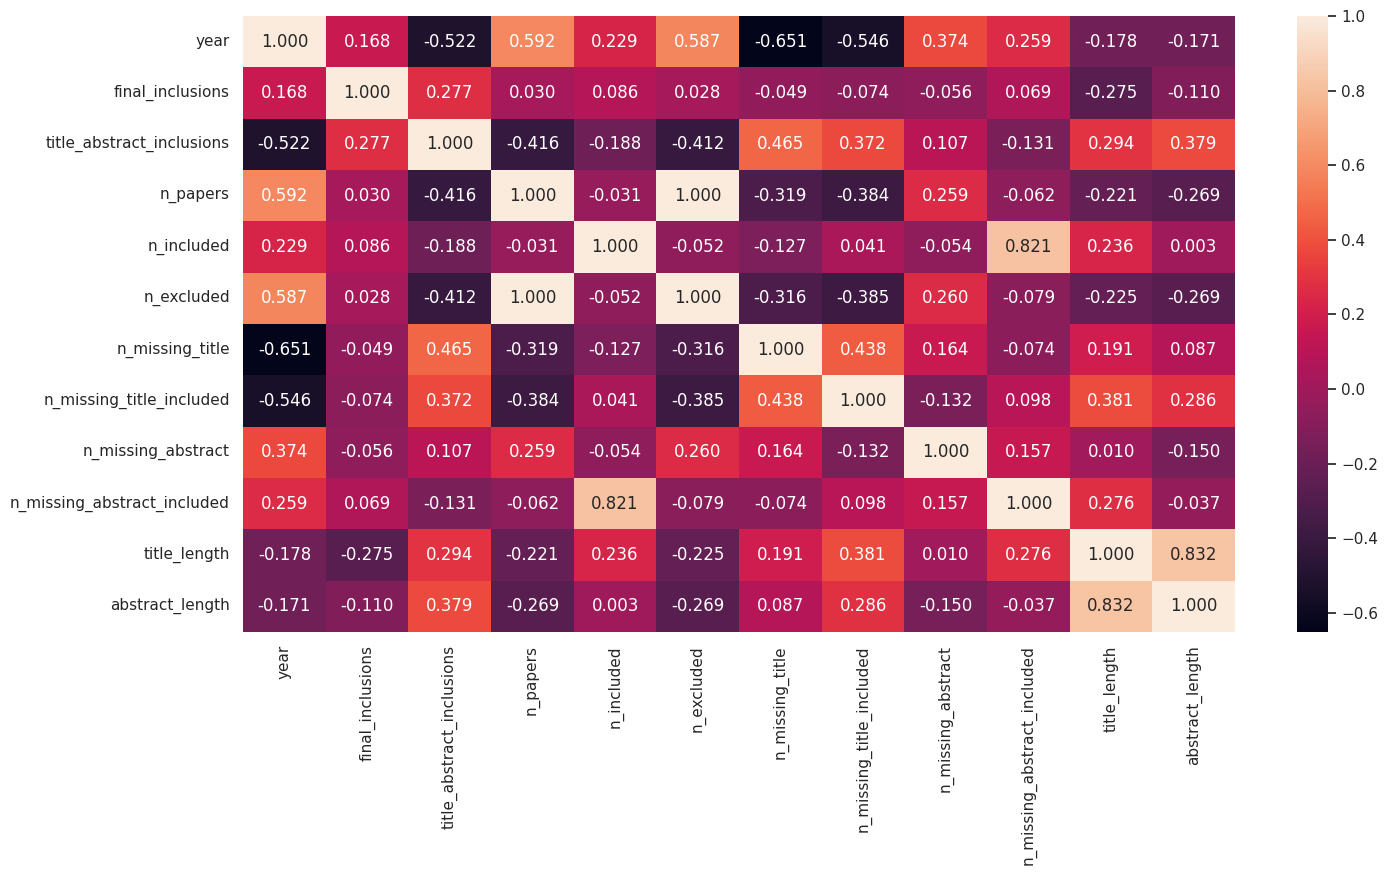

In [462]:
sns.set(rc = {'figure.figsize':(16, 8)})
sns.heatmap(data.corr(), annot = True, fmt = '.3f')

In [463]:
x=np.array(data[['n_papers', 'title_length', 'abstract_length']])#3 стовбчики у х
y=np.array(data['n_missing_title_included'])#назву у у


In [464]:
array_max = []#нормалізація
col_names = ['n_papers', 'title_length', 'abstract_length']
for col in col_names:
    x_col = np.array(data[col])
    x_max = max(x_col)
    array_max.append(x_max)
max_values = np.array(array_max)
x_normalized = x / max_values
x=x_normalized

In [465]:
pca=PCA(n_components=2)

In [466]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.01)

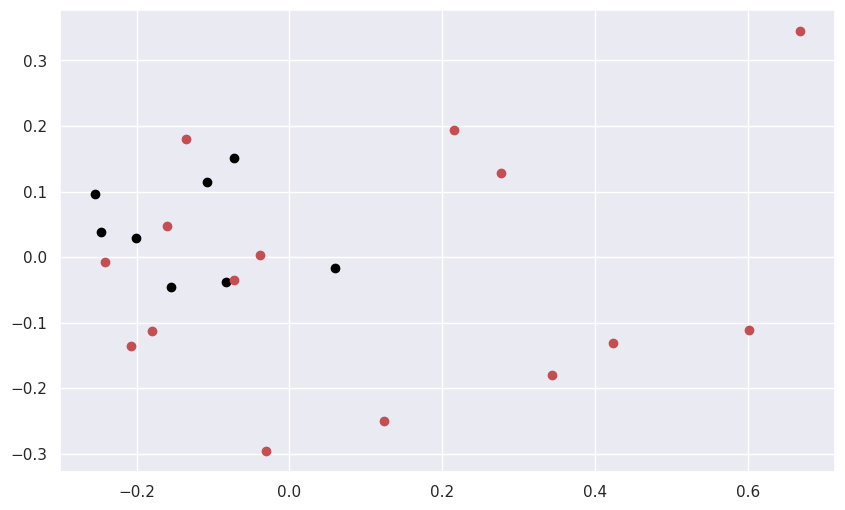

In [467]:
plt.figure(figsize=(10,6))
x_train_2=pca.fit_transform(x_train)
plt.plot(x_train_2[y_train==0,0],x_train_2[y_train==0,1],"or")
plt.scatter(x_train_2[y_train==1,0],x_train_2[y_train==1,1],c="black")
plt.grid(True)
plt.show()

KNN

In [468]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [469]:
knn_model = knn.fit(x_train, y_train)

In [470]:
y_pred = knn_model.predict(x_test)


In [471]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_test,y_pred))

[[1]]
1.0


In [472]:
x_area=[]#малюємо цяточки
for i in range(-100,100, 1):
  for j in range(-100,100,1):
    x_area.append([i/100,j/100])
x_area = np.array(x_area)
y_area = knn_model.predict(pca.inverse_transform(x_area))

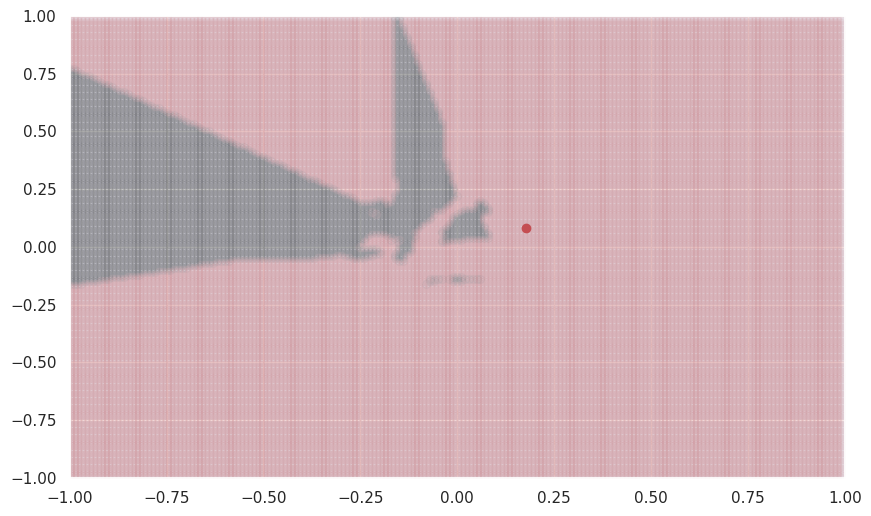

In [473]:
plt.figure(figsize=(10,6))#малюємо тестові точки як на 1 графіку а також цяточки
plt.xlim([-1, 1])
plt.ylim([-1, 1])
x_test_2 = pca.transform(x_test)
plt.plot(x_area[y_area==0,0], x_area[y_area==0,1], "or", alpha = 0.04)
plt.scatter(x_area[y_area==1,0], x_area[y_area==1,1], c="black", alpha = 0.04)
plt.plot(x_test_2[y_test==0,0], x_test_2[y_test==0,1], "or" )
plt.scatter(x_test_2[y_test==1,0], x_test_2[y_test==1,1], c="black")
plt.grid(True)
plt.show()

Дерево ухвалення рішення

In [474]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from random import randint


In [475]:
x0=data[['n_papers', 'title_length', 'abstract_length']]

In [476]:
tree=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1).fit(x_train,y_train)
prediction_tree = tree.predict(x_test)
confusion_matrix(y_test,prediction_tree)


array([[0, 1],
       [0, 0]])

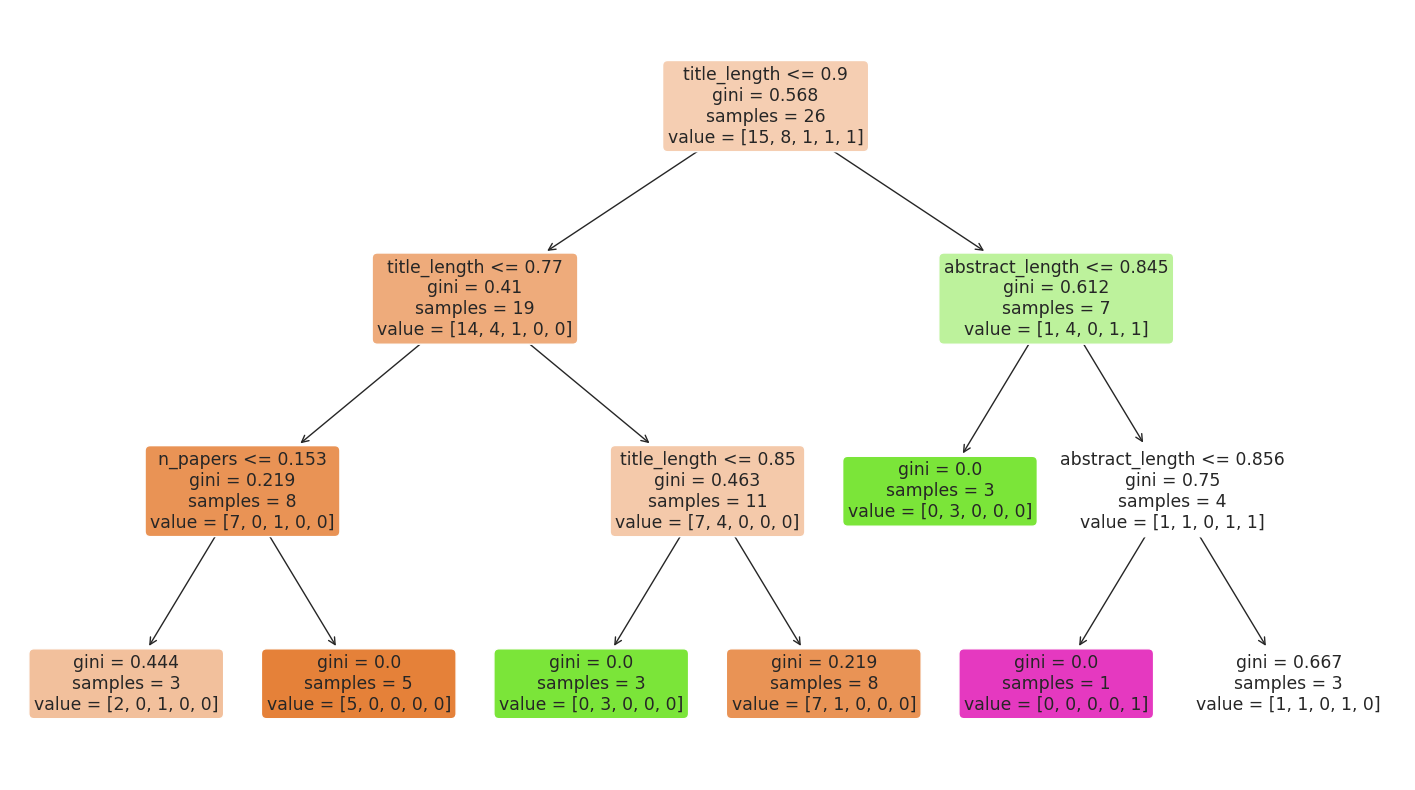

In [477]:
plt.figure(figsize=(18,10))
plot_tree(tree,filled=True,rounded=True,feature_names=x0.columns)
plt.show()


In [478]:
forest=RandomForestClassifier(criterion='gini',max_depth=3,random_state=1).fit(x_train,y_train)
prediction_forest=forest.predict(x_test)
confusion_matrix(y_test,prediction_forest)


array([[1]])

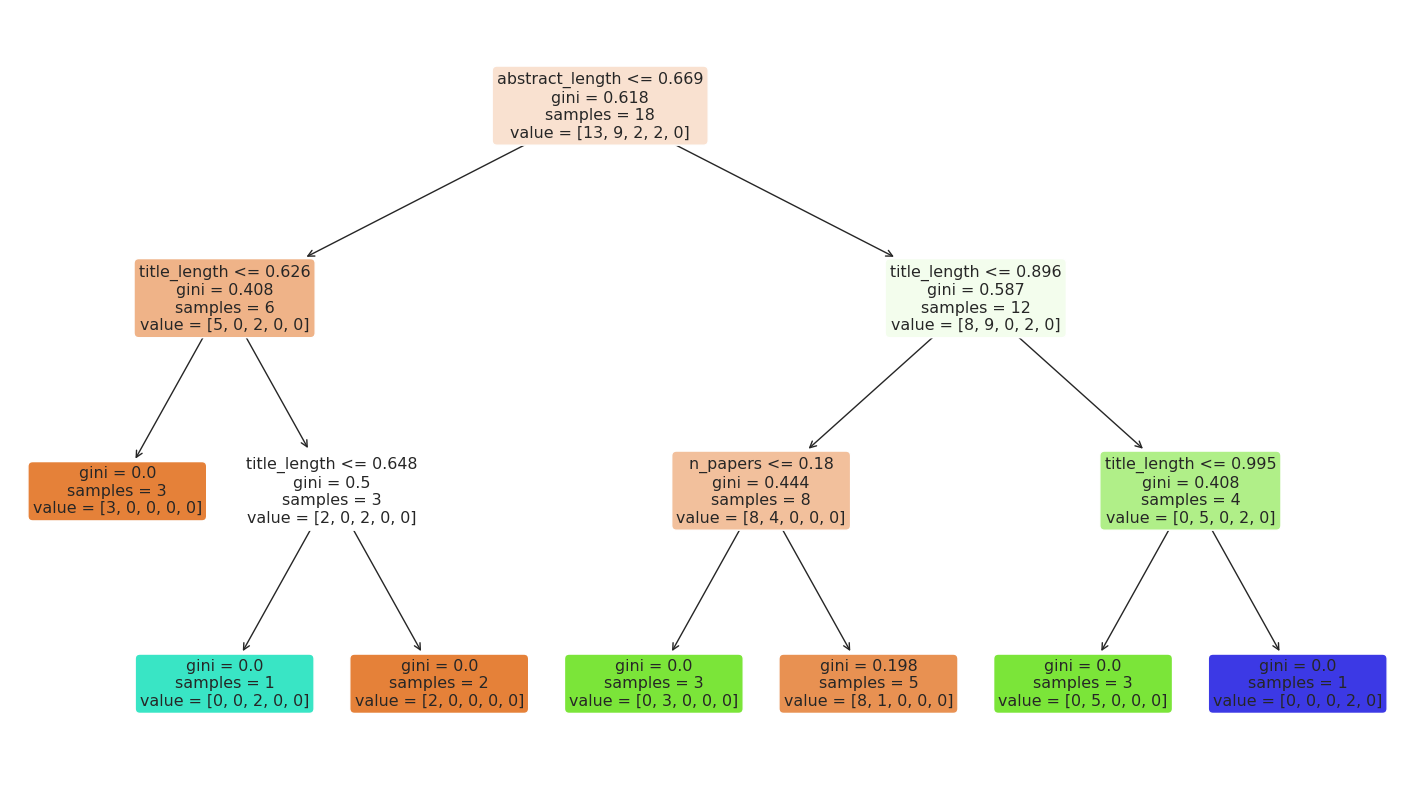

In [479]:
rand=randint(0,100)
plt.figure(figsize=(18,10))
plot_tree(forest.estimators_[rand],filled=True,rounded=True,feature_names=x0.columns)
plt.show()


In [480]:
print("DecisionTree:",accuracy_score(y_test,prediction_tree),"\nRandomForest:",accuracy_score(y_test,prediction_forest))

DecisionTree: 0.0 
RandomForest: 1.0


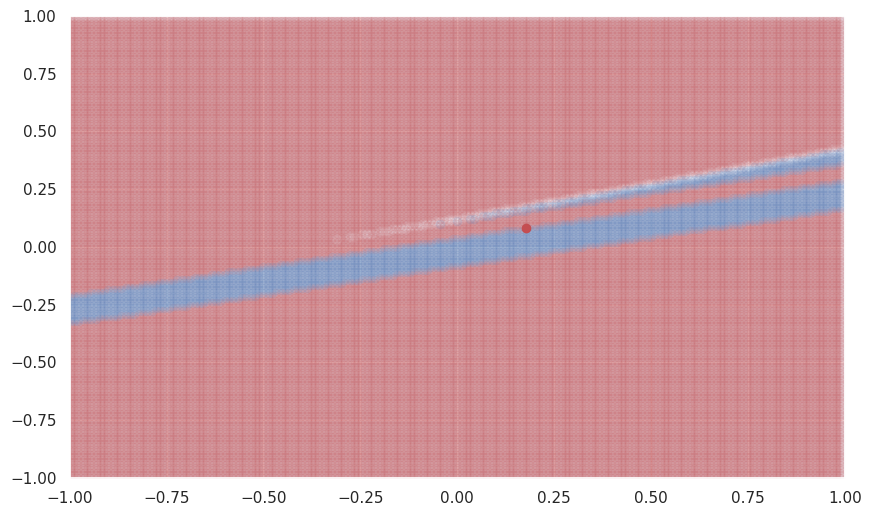

In [481]:
x_area=[]
for i in range(-90,90, 1):
  for j in range(-90,90,1):
    x_area.append([i/90,j/90])
x_area = np.array(x_area)
y_area = tree.predict(pca.inverse_transform(x_area))
plt.figure(figsize=(10,6))
plt.xlim([-1, 1])
plt.ylim([-1, 1])
x_test_2 = pca.transform(x_test)
plt.plot(x_area[y_area==0,0], x_area[y_area==0,1], "or", alpha = 0.1)
plt.plot(x_area[y_area==1,0], x_area[y_area==1,1], "ob", alpha = 0.1)
plt.plot(x_test_2[y_test==0,0], x_test_2[y_test==0,1], "or" )
plt.plot(x_test_2[y_test==1,0], x_test_2[y_test==1,1], "ob")
plt.grid(True)
plt.show()


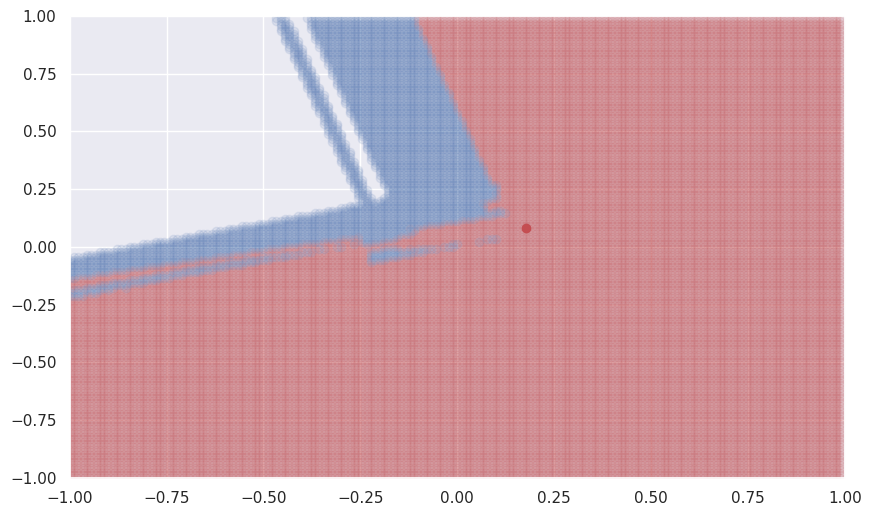

In [482]:
x_area=[]
for i in range(-90,90, 1):
  for j in range(-90,90,1):
    x_area.append([i/90,j/90])
x_area = np.array(x_area)
y_area = forest.predict(pca.inverse_transform(x_area))
plt.figure(figsize=(10,6))
plt.xlim([-1, 1])
plt.ylim([-1, 1])
x_test_2 = pca.transform(x_test)
plt.plot(x_area[y_area==0,0], x_area[y_area==0,1], "or", alpha = 0.1)
plt.plot(x_area[y_area==1,0], x_area[y_area==1,1], "ob", alpha = 0.1)
plt.plot(x_test_2[y_test==0,0], x_test_2[y_test==0,1], "or" )
plt.plot(x_test_2[y_test==1,0], x_test_2[y_test==1,1], "ob")
plt.grid(True)
plt.show()


SVM

In [483]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [484]:
grid = GridSearchCV(SVC(), param_grid, refit=True)

In [485]:
grid.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [486]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [487]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [488]:
clf_rbf = svm.SVC(kernel ='rbf',C=1000, gamma = 1)
clf_rbf.fit(x_train,y_train)
clf_rbf.score(x_train,y_train)

0.8461538461538461

In [489]:
y_pred=clf_rbf.predict(x_test)#матриця яка показує скільки даних вгадали
confusion_matrix(y_pred,y_test)

array([[0, 0],
       [1, 0]])

In [490]:
x_area=[]#малюємо цяточки
for i in range(-100,100, 1):
  for j in range(-100,100,1):
    x_area.append([i/100,j/100])
x_area = np.array(x_area)
y_area = clf_rbf.predict(pca.inverse_transform(x_area))

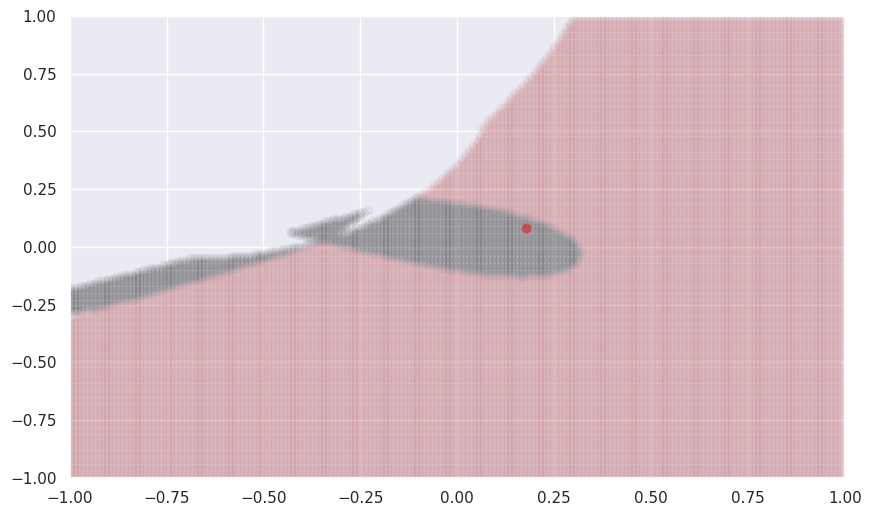

In [491]:
plt.figure(figsize=(10,6))#малюємо тестові точки як на 1 графіку а також цяточки
plt.xlim([-1, 1])
plt.ylim([-1, 1])
x_test_2 = pca.transform(x_test)
plt.plot(x_area[y_area==0,0], x_area[y_area==0,1], "or", alpha = 0.04)
plt.scatter(x_area[y_area==1,0], x_area[y_area==1,1], c="black", alpha = 0.04)
plt.plot(x_test_2[y_test==0,0], x_test_2[y_test==0,1], "or" )
plt.scatter(x_test_2[y_test==1,0], x_test_2[y_test==1,1], c="black")
plt.grid(True)
plt.show()

ADABOOST

In [492]:
from sklearn.ensemble import AdaBoostClassifier

In [493]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

In [494]:
adaboost.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [495]:
y_pred=adaboost.predict(x_test)

In [496]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_test,y_pred))

[[1]]
1.0


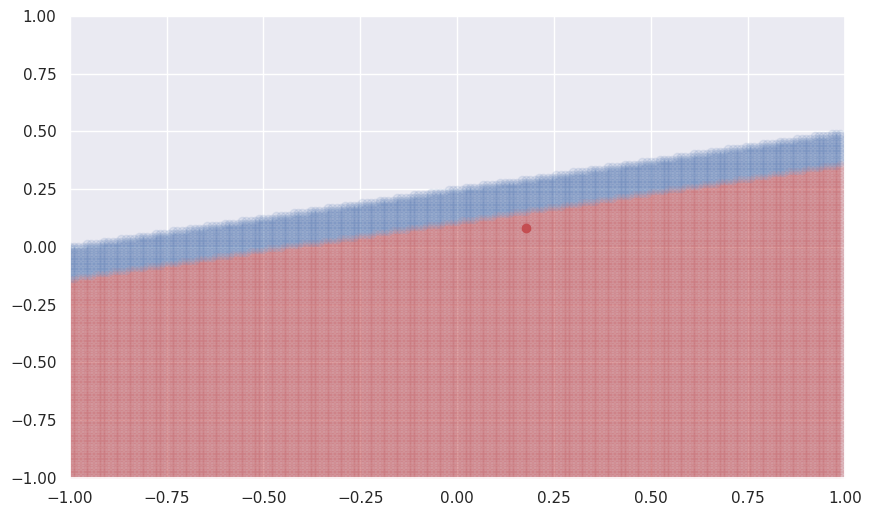

In [497]:
x_area=[]
for i in range(-90,90, 1):
  for j in range(-90,90,1):
    x_area.append([i/90,j/90])
x_area = np.array(x_area)
y_area = adaboost.predict(pca.inverse_transform(x_area))
plt.figure(figsize=(10,6))
plt.xlim([-1, 1])
plt.ylim([-1, 1])
x_test_2 = pca.transform(x_test)
plt.plot(x_area[y_area==0,0], x_area[y_area==0,1], "or", alpha = 0.1)
plt.plot(x_area[y_area==1,0], x_area[y_area==1,1], "ob", alpha = 0.1)
plt.plot(x_test_2[y_test==0,0], x_test_2[y_test==0,1], "or" )
plt.plot(x_test_2[y_test==1,0], x_test_2[y_test==1,1], "ob")
plt.grid(True)
plt.show()